# Counter detection

In [1]:
import warnings
warnings.filterwarnings('ignore')

**cv2.RETR_TREE**: Иерархия контуров позволяет определить, какие контуры находятся внутри других или являются дочерними контурами. 

**cv2.RETR_EXTERNAL** - сосредоточен на внешних контурах

**cv2.CHAIN_APPROX_SIMPLE**: Это метод аппроксимации контуров. Здесь используется метод CHAIN_APPROX_SIMPLE, который аппроксимирует контуры, используя только конечные точки сегментов. Это означает, что из множества точек, образующих контур, будут использованы только вершины.

**cv2.threshold** пиксели с интенсивностью выше порогового значения становятся белыми, а пиксели с интенсивностью ниже порогового значения становятся черными.

**Значение 127 VOODOO Threshold и дает лучший результат**

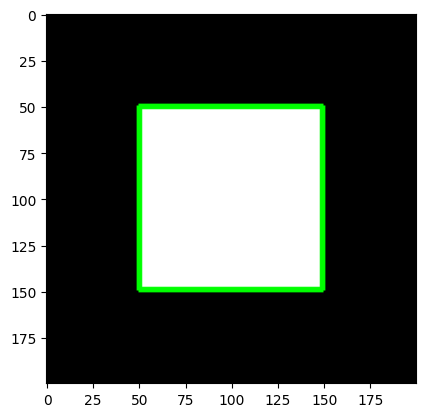

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((200, 200), dtype=np.uint8)
img[50:150, 50:150] = 255

"""
Threshold types: 
  cv::THRESH_BINARY = 0,
  cv::THRESH_BINARY_INV = 1,
  cv::THRESH_TRUNC = 2,
  cv::THRESH_TOZERO = 3,
  cv::THRESH_TOZERO_INV = 4,
  cv::THRESH_MASK = 7,
  cv::THRESH_OTSU = 8,
  cv::THRESH_TRIANGLE = 16
"""

# Пороговая обработка
ret, thresh = cv2.threshold(img, 127, 255, 0) #127 is a threhold and ret countains this param

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

#-1 - index of counter, mean all
# 2 - is a contour px size

img = cv2.drawContours(color, contours, -1, (0, 255, 0), 2) 

# cv2.imshow('contours', color)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(color)
# plt.axis('off') 

Переменная contours содержит только один контур, так как в данном примере изображение содержит только один контур. В других случаях, количество контуров может быть больше одного, и все они будут храниться в списке contours.

In [3]:
for contour_idx, contour in enumerate(contours):
    for point_idx, point in enumerate(contour):
        x, y = point[0]
        print(f'Contour Index: {contour_idx}, Point Index: {point_idx}, Point: ({x}, {y})')

Contour Index: 0, Point Index: 0, Point: (50, 50)
Contour Index: 0, Point Index: 1, Point: (50, 149)
Contour Index: 0, Point Index: 2, Point: (149, 149)
Contour Index: 0, Point Index: 3, Point: (149, 50)


# Bounding box, minimum area rectangle, and minimum enclosing circle

Ограничивающая рамка, прямоугольник минимальной площади и минимальный окружающий круг

**cv2.pyrDown()**  используется для понижения разрешения изображения, используя алгоритм пирамиды Гаусса. Этот алгоритм позволяет уменьшить размер изображения, сглаживая его и удаляя высокочастотные детали. Уменьшение происходит в два раза по каждому измерению как следствие изображение уменьшается в 4.

* На первом шаге она сглаживает исходное изображение с помощью фильтра Гаусса для удаления высокочастотных компонент.

* Затем изображение уменьшается в два раза по каждому измерению, что приводит к уменьшению его размера в четыре раза.

Использование **cv2.pyrDown()** выполняет субдискретизацию, что означает, что в уменьшенном изображении один пиксель представляет собой результат среднего значения из четырех пикселей в исходном изображении. Это приводит к потере деталей и уменьшению размера изображения в два раза по каждому измерению.

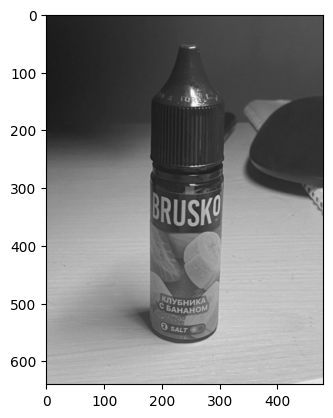

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


path = r"C:\Users\johnw\Pictures\brusko.jpg"

img = cv2.pyrDown(cv2.imread(path, 0))


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


## Thershold default types

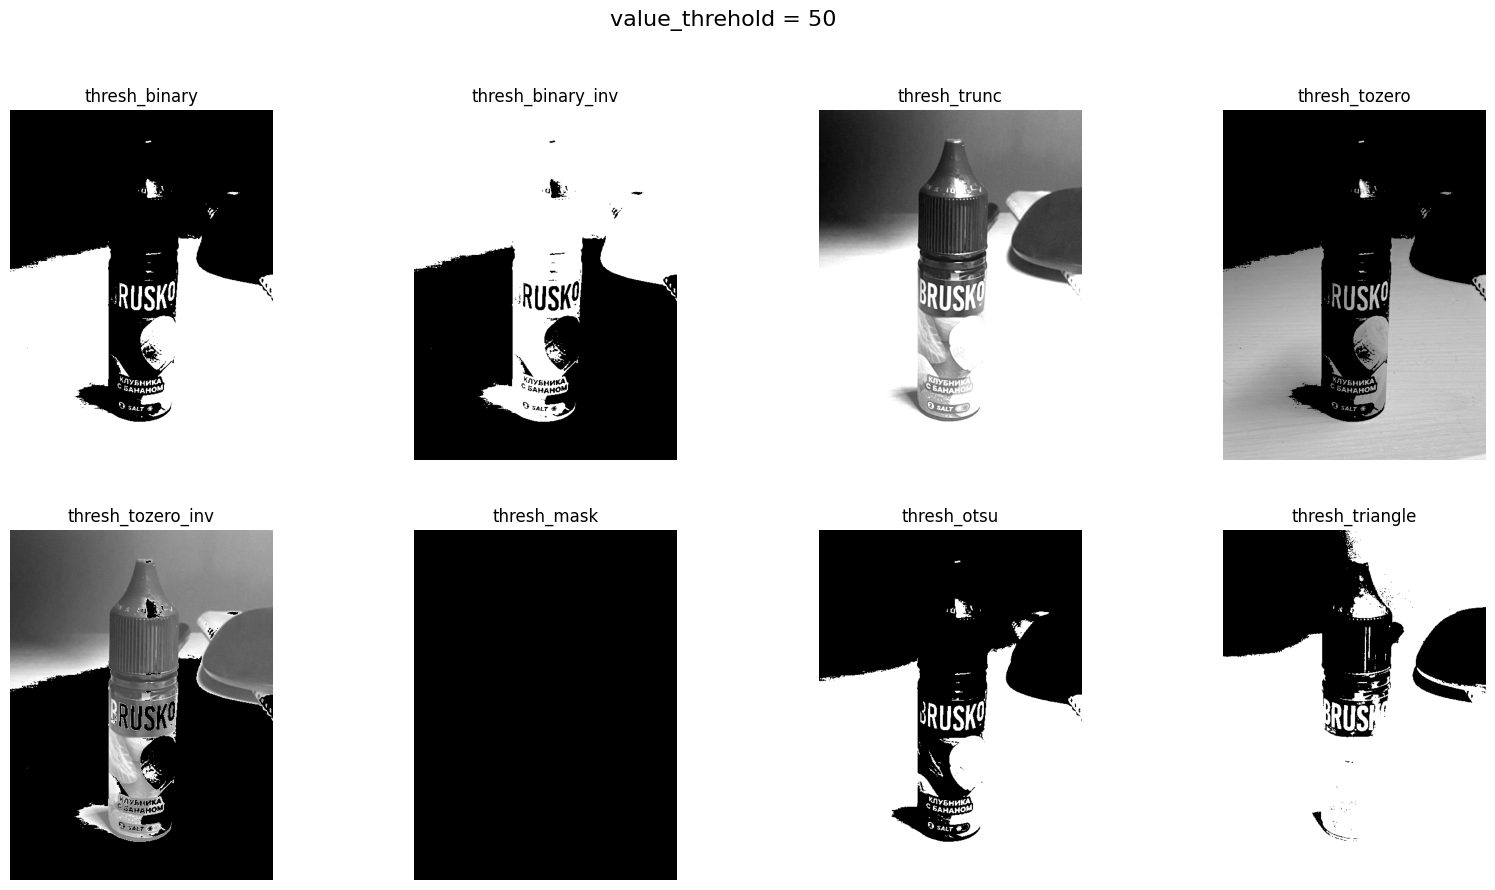

In [5]:
img = cv2.pyrDown(cv2.imread(path, 0))

"""
Threshold types: 
  cv::THRESH_BINARY = 0,
  cv::THRESH_BINARY_INV = 1,
  cv::THRESH_TRUNC = 2,
  cv::THRESH_TOZERO = 3,
  cv::THRESH_TOZERO_INV = 4,
  cv::THRESH_MASK = 7,
  cv::THRESH_OTSU = 8,
  cv::THRESH_TRIANGLE = 16
"""

value_threhold = 127
max_value_th = 255

ret, thresh_binary = cv2.threshold(img,value_threhold,max_value_th,0)
ret, thresh_binary_inv = cv2.threshold(img,value_threhold,max_value_th,1)
ret, thresh_trunc = cv2.threshold(img,value_threhold,max_value_th,2)
ret, thresh_tozero = cv2.threshold(img,value_threhold,max_value_th,3)
ret, thresh_tozero_inv = cv2.threshold(img,value_threhold,max_value_th,4)
ret, thresh_mask = cv2.threshold(img,value_threhold,max_value_th,7)
ret, thresh_otsu = cv2.threshold(img,value_threhold,max_value_th,8)
ret, thresh_triangle= cv2.threshold(img,value_threhold,max_value_th,16)


plt.subplots(3,2,figsize=(20,10))

plt.subplot(2, 4, 1)
plt.imshow(thresh_binary, cmap='gray')
plt.title('thresh_binary')
plt.axis('off') 

plt.subplot(2, 4, 2)
plt.imshow(thresh_binary_inv, cmap='gray')
plt.title('thresh_binary_inv')
plt.axis('off') 

  
plt.subplot(2, 4, 3)
plt.imshow(thresh_trunc, cmap='gray')
plt.title('thresh_trunc')
plt.axis('off') 

plt.subplot(2, 4, 4)
plt.imshow(thresh_tozero, cmap='gray')
plt.title('thresh_tozero')
plt.axis('off') 

plt.subplot(2, 4, 5)
plt.imshow(thresh_tozero_inv, cmap='gray')
plt.title('thresh_tozero_inv')
plt.axis('off') 

plt.subplot(2, 4, 6)
plt.imshow(thresh_mask, cmap='gray')
plt.title('thresh_mask')
plt.axis('off') 

plt.subplot(2, 4, 7)
plt.imshow(thresh_otsu, cmap='gray')
plt.title('thresh_otsu')
plt.axis('off') 

plt.subplot(2, 4, 8)
plt.imshow(thresh_triangle, cmap='gray')
plt.title('thresh_triangle')
plt.axis('off') 

plt.suptitle('value_threhold = 50', fontsize=16)

plt.show()


# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)



(-0.5, 479.5, 639.5, -0.5)

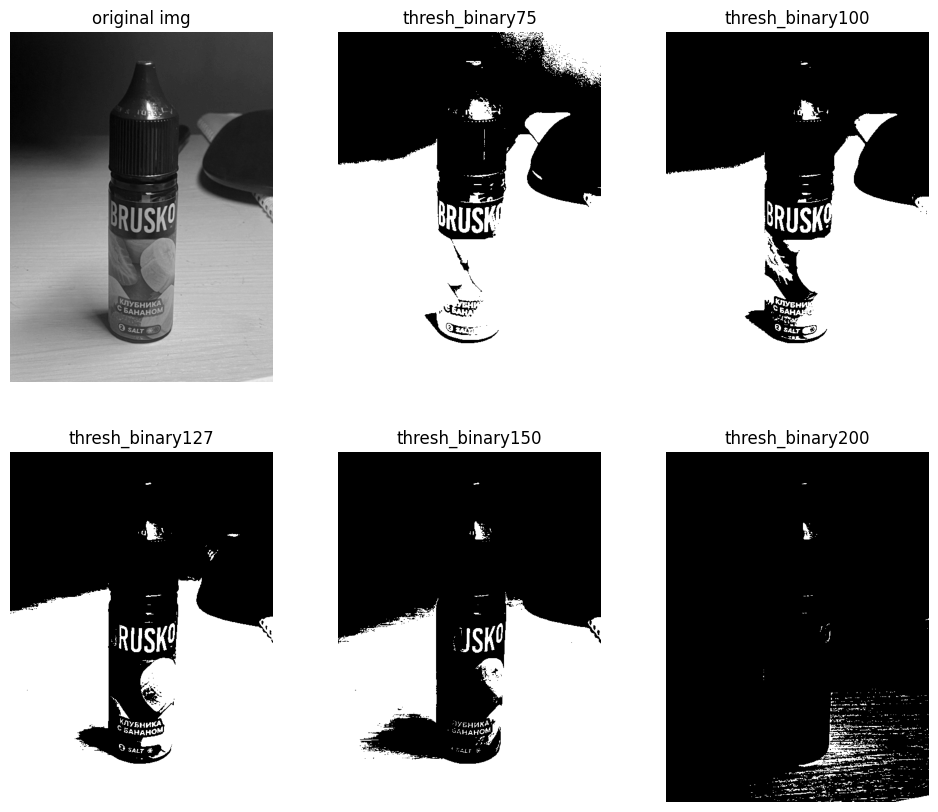

In [6]:

img = cv2.pyrDown(cv2.imread(path, 0))

"""
Threshold types: 
  cv::THRESH_BINARY = 0,
  cv::THRESH_BINARY_INV = 1,
  cv::THRESH_TRUNC = 2,
  cv::THRESH_TOZERO = 3,
  cv::THRESH_TOZERO_INV = 4,
  cv::THRESH_MASK = 7,
  cv::THRESH_OTSU = 8,
  cv::THRESH_TRIANGLE = 16
"""

ret, thresh_binary75 = cv2.threshold(img,75,255,0)
ret, thresh_binary100 = cv2.threshold(img,100,255,0)
ret, thresh_binary127 = cv2.threshold(img,127,255,0)
ret, thresh_binary150 = cv2.threshold(img,150,255,0)
ret, thresh_binary200 = cv2.threshold(img,200,255,0)


plt.subplots(3,2,figsize=(12,10))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('original img')
plt.axis('off') 

plt.subplot(2, 3, 2)
plt.imshow(thresh_binary75, cmap='gray')
plt.title('thresh_binary75')
plt.axis('off') 

plt.subplot(2, 3, 3)
plt.imshow(thresh_binary100, cmap='gray')
plt.title('thresh_binary100')
plt.axis('off') 

plt.subplot(2, 3, 4)
plt.imshow(thresh_binary127, cmap='gray')
plt.title('thresh_binary127')
plt.axis('off') 

plt.subplot(2, 3, 5)
plt.imshow(thresh_binary150, cmap='gray')
plt.title('thresh_binary150')
plt.axis('off') 

plt.subplot(2, 3, 6)
plt.imshow(thresh_binary200, cmap='gray')
plt.title('thresh_binary200')
plt.axis('off') 




# Find and draw BB, min area rectangle and min enclosing circle

Функция **cv2.boundingRect()** возвращает координаты и размеры прямоугольника, который полностью охватывает контур.   
Она возвращает 4 значения: x и y - координаты верхнего левого угла прямоугольника, в то время как w и h - его ширина и высота.

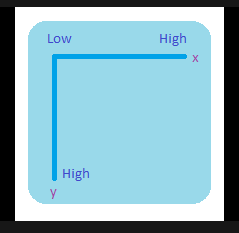

(x+w, y+h) -- координаты нижнего правого угла

In [7]:
path = r"C:\Users\johnw\Pictures\photo_2022-11-20_12-41-12.jpg"
img = cv2.pyrDown(cv2.imread(path))
img.shape

(640, 360, 3)

Number of contours:64
Number of valid contours: 3
Indicies of valid contours: [27, 59, 63]


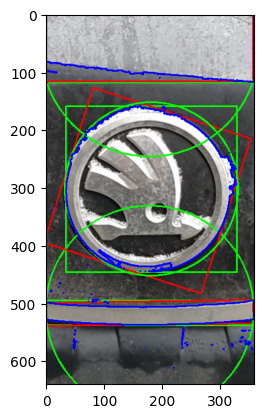

In [8]:
path = r"C:\Users\johnw\Pictures\photo_2022-11-20_12-41-12.jpg"
img = cv2.pyrDown(cv2.imread(path))

# Set to avoid unnecessary small objects
min_width = 20
min_height = 20

num_valid_bboxes = 0
valid_bbox_indxs = []

ret, thresh = cv2.threshold(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),
                            127,255,cv2.THRESH_BINARY)

contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                                  cv2.CHAIN_APPROX_SIMPLE)

print("Number of contours:" + str(len(contours)))

for idx, c in enumerate(contours):
    x, y, w, h = cv2.boundingRect(c)
    if w >= min_width and h >= min_height:
        
        #Draw rectangle with horizontal and vertical sides
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2) 
        
        # More accurate rectangle with sloping sides :
        
        # Find minimum area
        rect = cv2.minAreaRect(c)
        # Calculate cords of the minumum area rectangle
        box = cv2.boxPoints(rect)
        # Normalize cords to integers (because of px)
        box = np.int0(box)
        # Draw contours
        cv2.drawContours(img, [box], 0, (0, 0, 255), 2)
        
        '''Circles:'''
        # Calculate center and radius of minimum eclosing circle
        (x,y), radius = cv2.minEnclosingCircle(c)
        # cast to integers
        center = (int(x),int(y))
        radius = int(radius)
        # draw circle
        img = cv2.circle(img, center, radius, (0, 255, 0), 2)
        
        num_valid_bboxes += 1
        valid_bbox_indxs.append(idx)
    
cv2.drawContours(img,contours,-1,(255, 0, 0),2) #Draw All

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

print("Number of valid contours:", num_valid_bboxes)
print("Indicies of valid contours:", valid_bbox_indxs)
# cv2.imshow('contours',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Можем посмотреть определнный контур и нарисовать BB

(-0.5, 359.5, 639.5, -0.5)

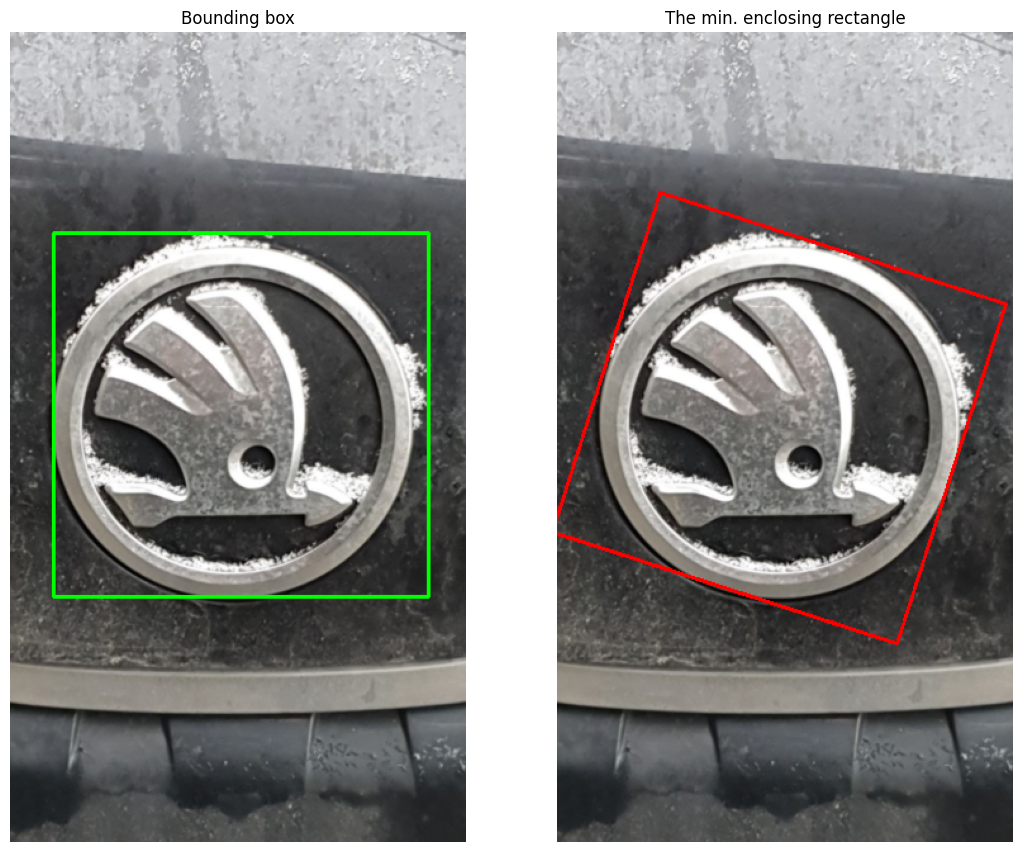

In [9]:
index = 59


img = cv2.pyrDown(cv2.imread(path))
img_copy1 = img.copy()
img_copy2 = img.copy()

ret, thresh = cv2.threshold(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),
                            127,255,cv2.THRESH_BINARY)

contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                                  cv2.CHAIN_APPROX_SIMPLE)

# BB
x, y, w, h = cv2.boundingRect(contours[index])
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Minimum enclosing rectangle
rect = cv2.minAreaRect(contours[index])
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img_copy1, [box], 0, (0, 0, 255), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_copy1 = cv2.cvtColor(img_copy1, cv2.COLOR_BGR2RGB)


plt.subplots(3,2,figsize=(20,20))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Bounding box')
plt.axis('off') 

plt.subplot(1, 3, 2)
plt.imshow(img_copy1)
plt.title('The min. enclosing rectangle')
plt.axis('off') 

# plt.subplot(1, 3, 3)
# plt.imshow(thresh_binary100, cmap='gray')
# plt.title('thresh_binary100')
# plt.axis('off') 
# plt.imshow(img)

(-0.5, 359.5, 639.5, -0.5)

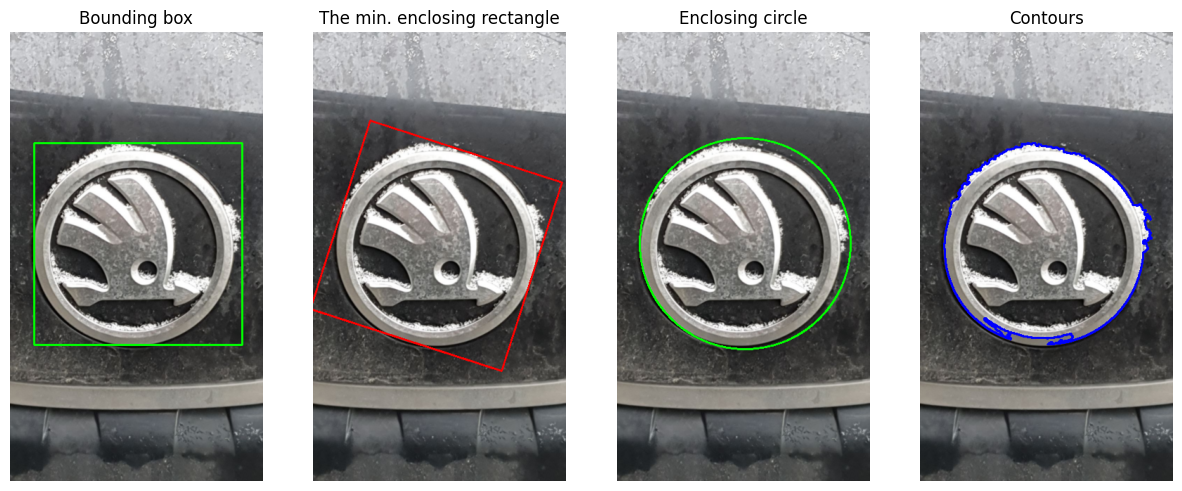

In [10]:
img = cv2.pyrDown(cv2.imread(path))
img_copy1 = img.copy()
img_copy2 = img.copy()
img_copy3 = img.copy()

ret, thresh = cv2.threshold(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),
                            127,255,cv2.THRESH_BINARY)

contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                                  cv2.CHAIN_APPROX_SIMPLE)

# BB
x, y, w, h = cv2.boundingRect(contours[index])
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Minimum enclosing rectangle
rect = cv2.minAreaRect(contours[index])
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img_copy1, [box], 0, (0, 0, 255), 2)


#Enclosing circle
(x,y), radius = cv2.minEnclosingCircle(contours[index])
center = (int(x),int(y))
radius = int(radius)
cv2.circle(img_copy2, center, radius, (0, 255, 0), 2)

#Contours
cv2.drawContours(img_copy3,contours,index,(255, 0, 0),2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_copy1 = cv2.cvtColor(img_copy1, cv2.COLOR_BGR2RGB)
img_copy2 = cv2.cvtColor(img_copy2, cv2.COLOR_BGR2RGB)
img_copy3 = cv2.cvtColor(img_copy3, cv2.COLOR_BGR2RGB)

plt.subplots(3,2,figsize=(15,8))

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Bounding box')
plt.axis('off') 

plt.subplot(1, 4, 2)
plt.imshow(img_copy1)
plt.title('The min. enclosing rectangle')
plt.axis('off') 

plt.subplot(1, 4, 3)
plt.imshow(img_copy2)
plt.title('Enclosing circle')
plt.axis('off') 

plt.subplot(1, 4, 4)
plt.imshow(img_copy3)
plt.title('Contours')
plt.axis('off') 



   **Ограничительная рамка или BB - Bounding Box**  

**cv2.boundingRect** находит ширину и высоту ограничивающего прямоугольника путем вычисления разницы между максимальными и минимальными значениями координат x и y всех точек контура + 1

Таким образом мы можем получить кординаты нижнего правого угла.
С помощью функции **cv.rectangle** отрисовать прямоугольник, однако он будет с вертикальными и горизонтальными сторонами.  

  **Минимально охватывающий прямоугольник или minimal enclosing rectangle**  
  
Есть второй способ. Можно обратиться с помощью **cv2.minAreaRect** к контуру и получить структуру данных, содержащую информацию о прямоугольнике, такую как координаты его центра, ширина, высота и угол наклона. Прямоугольник имеет минимальную площадь, что означает, что он тесно обрамляет все точки контура, при этом занимая минимальную возможную площадь.

Далее на основе полученной структуры от cv2.minAreaRect применим **cv2.boxPoints** чтобы получить 4 вершины прямоугольника.Ну а дальше дело за малым, преобразуем в целочисленный формат тк изображения в пикселях и отрисуем контур.

cv2.drawContours(img, **[box]**, 0, (0, 0, 255), 2)

Функция cv2.drawContours() может принимать несколько контуров, если они представлены в виде списка или массива.

Почему **[box]** ? - так  создаем список с одним элементом из массива numpy. (в списке numpy array). Это сделано для того, чтобы передать этот контур как список контуров в функцию cv2.drawContours().Если передать просто box, а не [box], то функция cv2.drawContours() ожидала бы, что box представляет собой список контуров, а не один контур, и это вызвало бы ошибку.

In [11]:
cv2.boundingRect(contours[7])

(243, 571, 3, 3)

In [12]:
contours[7]

array([[[244, 571]],

       [[243, 572]],

       [[243, 573]],

       [[245, 571]]], dtype=int32)

In [13]:
cv2.minAreaRect(contours[7])

((243.75001525878906, 571.75), (0.7071067094802856, 2.8284268379211426), 45.0)

In [14]:
[box]

[array([[ -4, 395],
        [ 81, 127],
        [354, 215],
        [268, 483]], dtype=int64)]

In [15]:
print(type([box])), print(type(box))

<class 'list'>
<class 'numpy.ndarray'>


(None, None)

In [16]:
cv2.minEnclosingCircle(contours[59]) #x,y and radius

((182.34744262695312, 302.2157897949219), 150.08758544921875)

## Convex contours and Douglas-Peucker algorithm

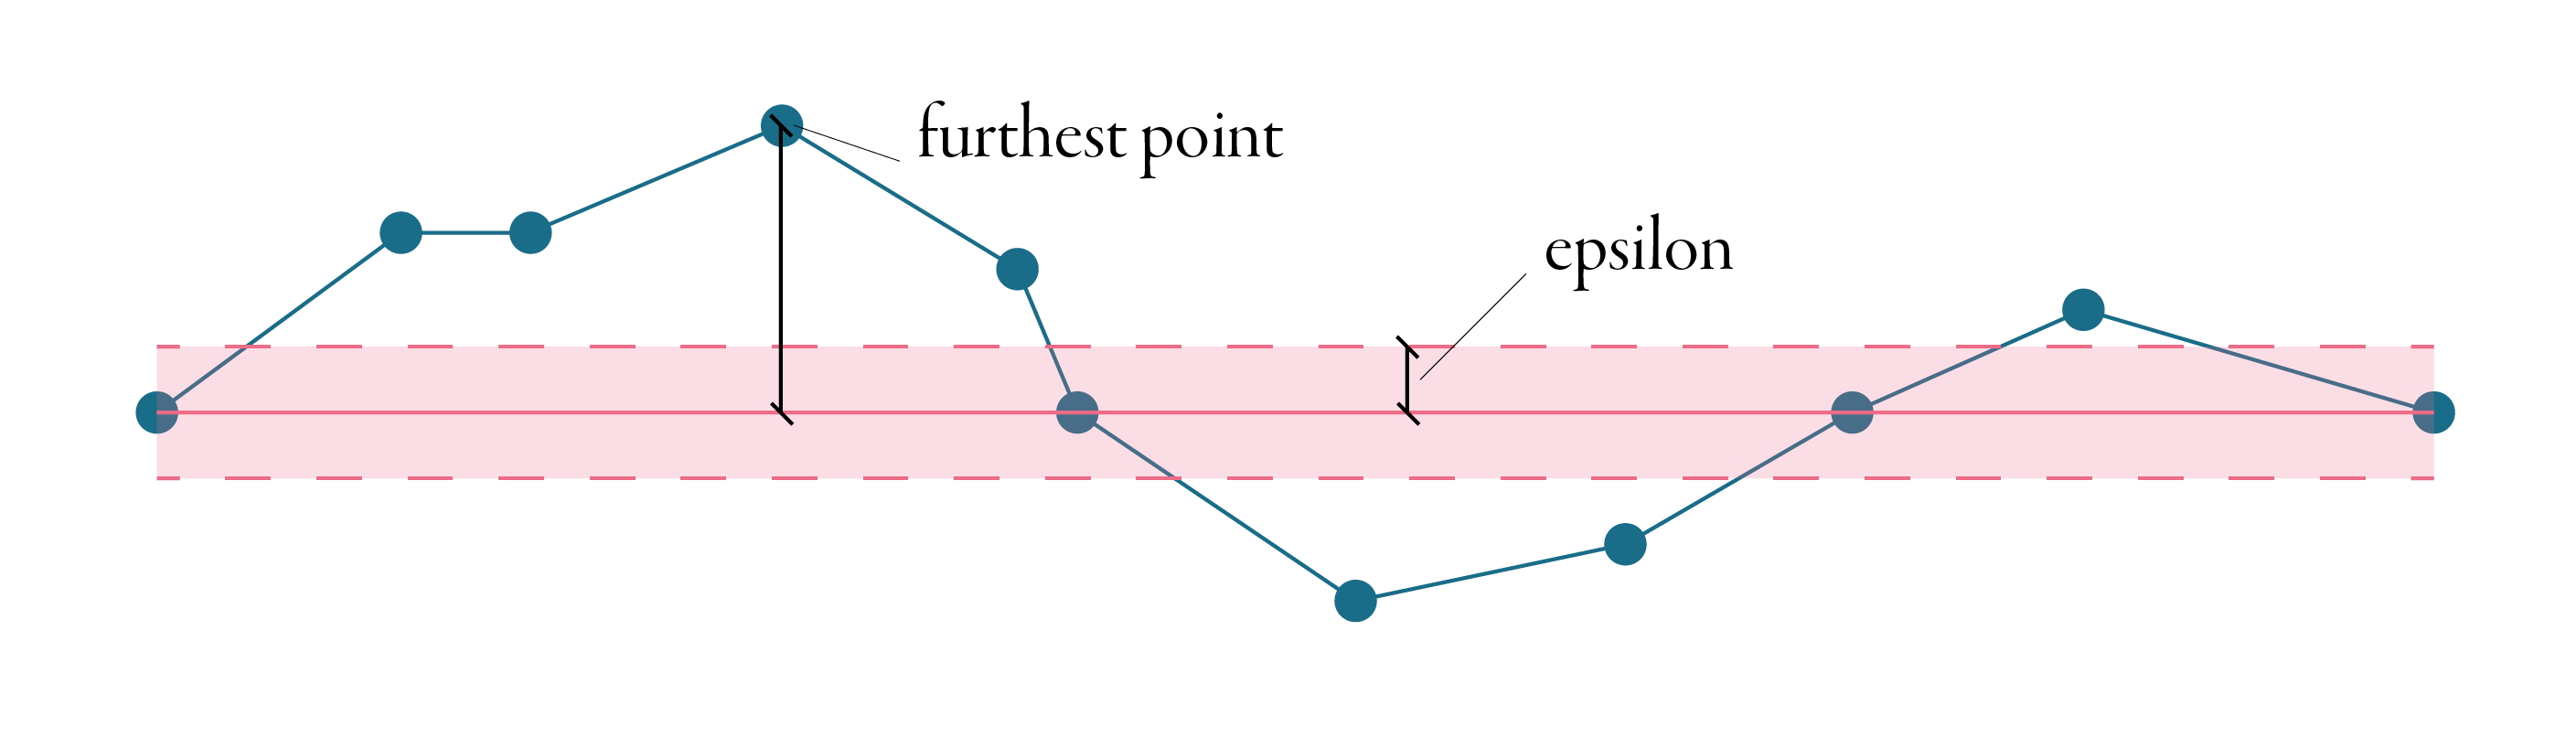

Douglas-Peucker, or sometimes Ramer–Douglas–Peucker algorithm, is the better known of the two. Its main aim is to identify those points, which are less important for the overall shape of the line and remove them. It does not generate any new point.

The algorithm accepts typically one parameter, tolerance, sometimes called **epsilon**. To explain how is epsilon used, it is the best to start with the principle. Douglas-Peucker is an iterative algorithm - it removes the point, splits the line and starts again until there is no point which could be removed. In the first step, it makes a line between the first and the last points of the line, as illustrated in the figure below. Then it identifies the point on the line, which is the furthest from this line connecting endpoints. If the distance between the line and the point is less than epsilon, the point is discarded, and the algorithm starts again until there is no point between endpoints.

If the distance between the point and the line is larger than epsilon, the first and the furthest points are connected with another line and every point, which is closer than epsilon to this line gets discarded. Every time a new furthest point is identified, our original line splits in two and the algorithm continues on each part separately. 

Source: https://martinfleischmann.net/line-simplification-algorithms/#:~:text=Douglas%2DPeucker%20is%20an%20iterative,illustrated%20in%20the%20figure%20below.

Вычисляем приближенный многоугольник, периметр которого может отличаться от исходного контура на коэф. epsilon. Также есть параметр flag отвечающий за замкнутость полигона.  


epsilon = 0.01 * cv2.arcLength(cnt,True)  
approx = cv2.approxPolyDP(cnt,epsilon,True)

The function **cv::convexHull** finds the convex hull of a 2D point set using the Sklansky's algorithm that has O(N logN) complexity in the current implementation.

(-0.5, 359.5, 639.5, -0.5)

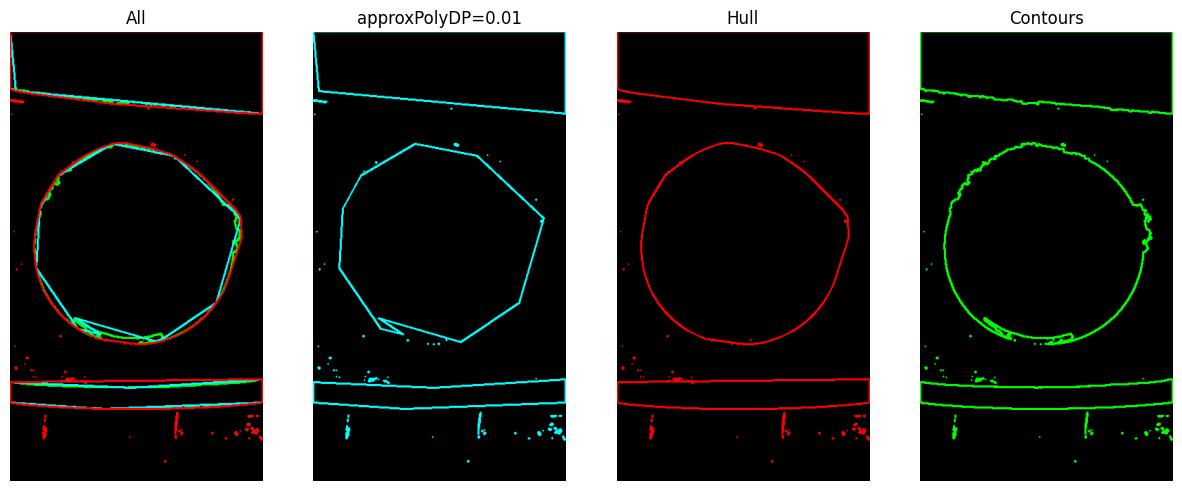

In [17]:
path = r"C:\Users\johnw\Pictures\photo_2022-11-20_12-41-12.jpg"

ima = cv2.pyrDown(cv2.imread(path))



ret, thresh = cv2.threshold(cv2.cvtColor(ima,cv2.COLOR_BGR2GRAY),
                            127,255,cv2.THRESH_BINARY)

contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                                  cv2.CHAIN_APPROX_SIMPLE)

black = np.zeros_like(ima)

black_copy1 = black.copy()
black_copy2 = black.copy()
black_copy3 = black.copy()

for cnt in contours:
    #cv2.arcLength() is used to calculate the perimeter of the contour. True means the contour to be closed.
    epsilon = 0.01 * cv2.arcLength(cnt,True) 
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    hull = cv2.convexHull(cnt)
    
    cv2.drawContours(black,[cnt],-1,(0, 255, 0),2) #Green
    cv2.drawContours(black,[approx],-1,(255, 255, 0),2) #Marine
    cv2.drawContours(black,[hull],-1,(0, 0, 255),2) #Red
    
    cv2.drawContours(black_copy1,[approx],-1,(255, 255, 0),2) #Marine
    cv2.drawContours(black_copy2,[hull],-1,(0, 0, 255),2) #Red
    cv2.drawContours(black_copy3,[cnt],-1,(0, 255, 0),2) #Green
    

black = cv2.cvtColor(black, cv2.COLOR_BGR2RGB)
black_copy1 = cv2.cvtColor(black_copy1, cv2.COLOR_BGR2RGB)
black_copy2 = cv2.cvtColor(black_copy2, cv2.COLOR_BGR2RGB)
black_copy3 = cv2.cvtColor(black_copy3, cv2.COLOR_BGR2RGB)

plt.subplots(3,2,figsize=(15,8))

plt.subplot(1, 4, 1)
plt.imshow(black)
plt.title('All')
plt.axis('off') 

plt.subplot(1, 4, 2)
plt.imshow(black_copy1)
plt.title('approxPolyDP=0.01')
plt.axis('off') 

plt.subplot(1, 4, 3)
plt.imshow(black_copy2)
plt.title('Hull')
plt.axis('off') 

plt.subplot(1, 4, 4)
plt.imshow(black_copy3)
plt.title('Contours')
plt.axis('off') 


This works good with simple imgs which have only one or few objects, and only few colors that are easily can be thresholded.

# Detecting lines, circles and other shapes

## Detecting lines

Remind:
Canny uses the Hysteresis thresholding. In this, we set two thresholds ‘High’ and ‘Low’.. The smallest value between threshold1 and threshold2 is used for edge linking. The largest value is used to find initial segments of strong edges

* Any edges with intensity greater than ‘High’ are the sure edges.
* Any edges with intensity less than ‘Low’ are sure to be non-edges.
* The edges between ‘High’ and ‘Low’ thresholds are classified as edges only if * they are connected to a sure edge otherwise discarded.

OpenCV implements two kind of Hough Line Transforms:

**a.** The Standard Hough Transform

It consists in pretty much what we just explained in the previous section. It gives you as result a vector of couples (θ,rθ)
In OpenCV it is implemented with the function HoughLines

**b.** The Probabilistic Hough Line Transform  

A more efficient implementation of the Hough Line Transform. It gives as output the extremes of the detected lines (x0,y0,x1,y1)
In OpenCV it is implemented with the function HoughLinesP()

В функции **cv2.HoughLinesP** параметр **threshold** контролирует минимальное количество пикселей для определения линии. Каждый найденный пиксель находится в голосовании за линию в пространстве параметров ρ (rho) и θ (theta). Линии с голосами выше порогового значения будут считаться обнаруженными.

Если уменьшить значение threshold, будут обнаруживаться линии с меньшим количеством votes (или пикселей). Это может привести к тому, что будут обнаруживаться даже очень короткие или менее явные линии, что может привести к увеличению количества обнаруженных линий.

Увеличение значения threshold может привести к тому, что только наиболее явные и длинные линии будут обнаружены, и менее явные или короткие линии будут проигнорированы. 

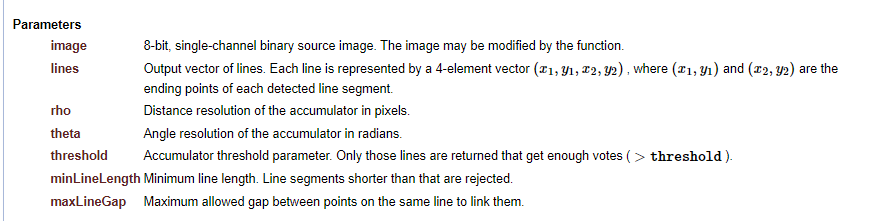

**cv2.HoughLinesP takes a single channel binary img**

void cv::**HoughLinesP** parabalistic , 	works faster than HoughLines  
(img -- input ,  
rho -- the resolution or step size to use  -- is the position step size in pixels,  
theta -- rotational step size,  
threshold -- below lines discarded,  
minLineLength -- shorter lines discarded  
maxLineGap -- maximum size of gap before the two segments considered as 2 separate lines)	 

In [18]:
#1 degree in radian
np.pi/ 180

0.017453292519943295

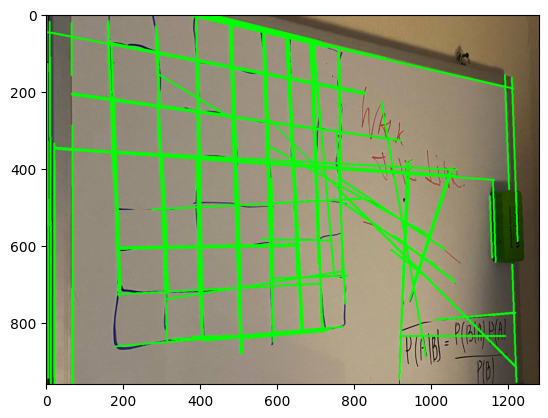

In [19]:
path = r"C:\Users\johnw\Pictures\lines.jpg"

def drawlines(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,50,200)

    # #Search for lines that are separated by as little as 1 pixel and ~1 degree
    lines = cv2.HoughLinesP(edges,
                            rho=1,
                            theta=np.pi/180.0,
                            threshold=100,
                            minLineLength=100,
                            maxLineGap=110)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 3)


    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
drawlines(path)

the result is not perfect because of the self-made lines were drawn crookedly xd. We can get better results by taking images with normal lines.
Btw HoughLinesP parameters can be added to function drawlines() but it works well without any changes in this case.

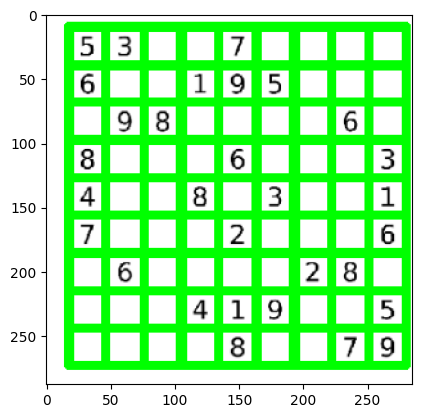

In [20]:
path = r"C:\Users\johnw\Pictures\lines_sudo.png"
drawlines(path)

## Detecting circles

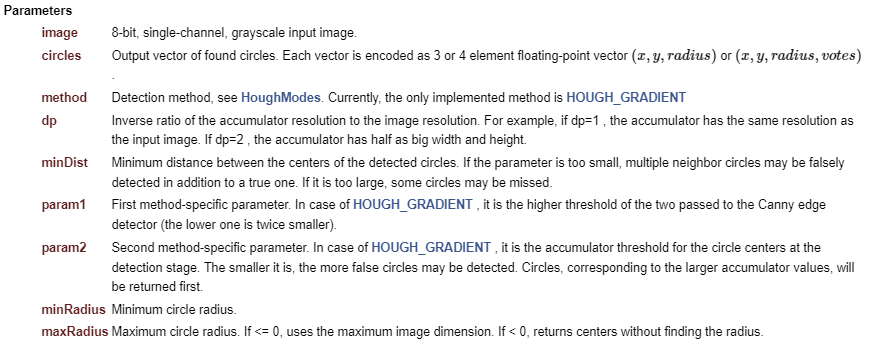

    image: Это входное одноканальное (8-битное) изображение, на котором вы ищете круги.

    method: Метод обнаружения кругов. В OpenCV есть два метода: cv2.HOUGH_GRADIENT (более быстрый) и cv2.HOUGH_GRADIENT_ALT (более точный).

    dp: Это параметр разрешения в пространстве параметров, который определяет размерность аккумулятора. Обычно, dp равно 1, что означает, что размерность аккумулятора равна размерности входного изображения.

    minDist: Это минимальное расстояние между центрами обнаруженных кругов. Если два центра кругов находятся ближе, чем minDist, то один из них будет проигнорирован.

    circles: Это выходной параметр, представляющий массив найденных кругов. Он представляет собой N x 1 x 3 массив, где N - количество обнаруженных кругов. Каждый круг представлен тремя значениями: координаты центра x и y, и радиус r.

    param1 и param2: Это дополнительные параметры для метода обнаружения кругов. Их значения зависят от выбранного метода.

    minRadius и maxRadius: Это диапазон допустимых радиусов обнаруженных кругов.

Синтаксис: cv2.circle(изображение, center_coordinates, радиус, цвет, толщина)

(-0.5, 662.5, 447.5, -0.5)

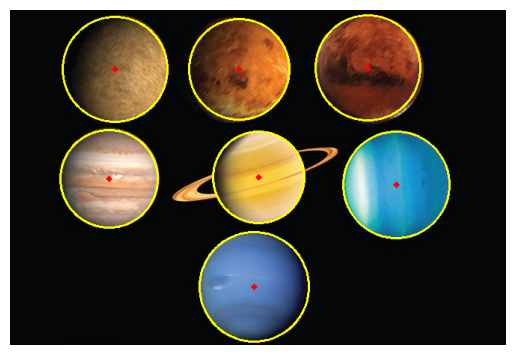

In [30]:
import numpy as np

planets = cv2.imread(r"C:\Users\johnw\Pictures\planet1.jpg")
gray_img = cv2.cvtColor(planets,cv2.COLOR_BGR2GRAY)
gray_img = cv2.medianBlur(gray_img, 5)

# HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) 
circles = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1,120,
                          param1=150, param2=30, minRadius=0, maxRadius=0)

if circles is not None:
    # Convert the circles array to uint16 data type
    circles = np.uint16(np.around(circles))

if circles is not None:
    circles = circles[0, :]  # Get rid of the extra dimension
    for i in circles:
        cv2.circle(planets,(i[0],i[1]),i[2],(0,255,255),2)
        cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)
               
planets = cv2.cvtColor(planets,cv2.COLOR_BGR2RGB)
plt.imshow(planets)
plt.axis('off') 

Circles представляет собой трехмерный массив размера N x 1 x 3, где N - количество обнаруженных кругов. Каждый круг описывается тремя значениями: координатами центра (x, y) и радиусом r. ( после cv2.HoughtCircles....)

Ячейку назад действием circles[0, :] все изменилось..

In [32]:
circles

array([[516, 234,  71],
       [332, 224,  61],
       [306,  80,  67],
       [326, 370,  73],
       [478,  78,  70],
       [132, 226,  65],
       [140,  80,  70]], dtype=uint16)

In [31]:
print(circles.shape)
print(circles[0][:1])

(7, 3)
[516]


In [33]:
circles

array([[516, 234,  71],
       [332, 224,  61],
       [306,  80,  67],
       [326, 370,  73],
       [478,  78,  70],
       [132, 226,  65],
       [140,  80,  70]], dtype=uint16)